In [1]:
import pandas as pd
from datetime import datetime as dt

In [2]:
data = pd.read_csv("/media/sf_Lab/yellow_tripdata_2018-01.csv", usecols = ['tpep_pickup_datetime', 'PULocationID', 'DOLocationID'])
data2 = pd.read_csv("/media/sf_Lab/taxi _zone_lookup.csv")
borough = data.join(data2.set_index('LocationID'), on='PULocationID')


In [18]:
borough_trips = borough['Borough'].value_counts() 
borough_trips = borough_trips.to_frame(name = "Total Trips")
#count the trips in every borough and convert from series to dataframe 


In [4]:
date_format = '%Y-%m-%d  %H:%M:%S'
borough['tpep_pickup_datetime'] = pd.to_datetime(borough['tpep_pickup_datetime'])
#convert pickup time to datetime format

In [10]:
month_days = borough['tpep_pickup_datetime'].dt.daysinmonth
month_days = month_days.to_frame(name = "Days_of_the_Month").tail(1).Days_of_the_Month.item()

In [16]:
borough_trips['Average Trips per Day (Borough)'] = borough_trips["Total Trips"] / month_days
#divide borough_count with datetime (get days of a month according to a year from datetime) to get the average trips per day

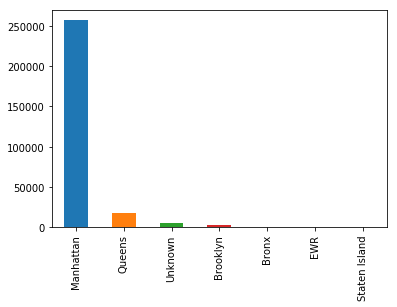

In [17]:
borough_trips['Average Trips per Day (Borough)'].plot.bar()